# Pandas

### Inspecting a DataFrame
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- head() returns the first few rows (the “head” of the DataFrame).
- info() shows information on each of the columns, such as the data type and number of missing values.
- shape returns the number of rows and columns of the DataFrame.
- describe() calculates a few summary statistics for each column.

In [129]:
# Import pandas package
import pandas as pd

# Read homelessness data
homelessness = pd.read_csv('../data/homelessness.csv')

# Print the head of the homelessness data
print(homelessness.head())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588


In [130]:
# Print information about homelessness
print(homelessness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB
None


In [131]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 5)


In [132]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


### Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:
- values: A two-dimensional NumPy array of values.
- columns: An index of columns: the column names.
- index: An index for the rows: either row numbers or row names.

You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. 

In [133]:
# Print the first 5 values of homelessness
print(homelessness[:5].values)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]]


In [134]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [135]:
# Print the row index of homelessness
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


### Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

In [136]:
# Select the first five rows then sort a one column:
homelessness[:5].sort_values('region')

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
2,Mountain,Arizona,7259.0,2606.0,7158024
1,Pacific,Alaska,1434.0,582.0,735139
4,Pacific,California,109008.0,20964.0,39461588
3,West South Central,Arkansas,2280.0,432.0,3009733


In [137]:
# To sort multiple columns and descend the first column then print only the first five rows:
homelessness.sort_values(['region', 'individuals'], ascending=[False, True])[:5]

,region,state,individuals,family_members,state_pop
3,West South Central,Arkansas,2280.0,432.0,3009733
18,West South Central,Louisiana,2540.0,519.0,4659690
36,West South Central,Oklahoma,2823.0,1048.0,3940235
43,West South Central,Texas,19199.0,6111.0,28628666
34,West North Central,North Dakota,467.0,75.0,758080


### Subsetting rows
A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

In [138]:
# Filter for rows where individuals is greater than 10000
homelessness[homelessness['individuals'] > 1e4]

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


In [139]:
# Filter for rows where region is Mountain
homelessness[homelessness['region'] == 'Mountain']

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [140]:
# Filter for rows where family_members is less than 1000 and region is Pacific
homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


### Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

In [141]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
homelessness[homelessness['region'].isin(['South Atlantic', 'Mid-Atlantic'])]

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


### Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [142]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama       2570.0           864.0    4887681   
1             Pacific      Alaska       1434.0           582.0     735139   
2            Mountain     Arizona       7259.0          2606.0    7158024   
3  West South Central    Arkansas       2280.0           432.0    3009733   
4             Pacific  California     109008.0         20964.0   39461588   

      total  p_individuals  
0    3434.0       0.748398  
1    2016.0       0.711310  
2    9865.0       0.735834  
3    2712.0       0.840708  
4  129972.0       0.838704  


### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [143]:
sales = pd.read_csv('../data/walmart.csv')

# Print the mean of weekly_sales
print(f"mean: {sales['weekly_sales'].mean()}")

# Print the median of weekly_sales
print(f"median: {sales['weekly_sales'].median()}")

mean: 23843.95014850566
median: 12049.064999999999


### Summarizing dates
Summary statistics can also be calculated on date columns that have values with the data type datetime64. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [144]:
# Print the maximum of the date column
print(f"max: {sales['date'].max()}")

# Print the minimum of the date column
print(f"min: {sales['date'].min()}")

max: 2012-10-26
min: 2010-02-05


### Efficient summaries
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient.

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [145]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(f"IQR: {sales['temperature_c'].agg(iqr)}")

IQR: 16.583333333333336


In [146]:
# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment and us NumPy median
import numpy as np
print(sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [147]:
# Create a sales data for department 1 of store 1 and add copy method to explicitly copy the data
sales_1_1 = sales[(sales['department'] == 1) & (sales['store'] == 1)].copy()

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [148]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])
print(store_types)

      store type  department        date  weekly_sales  is_holiday  \
0         1    A           1  2010-02-05      24924.50       False   
901       2    A           1  2010-02-05      35034.06       False   
1798      4    A           1  2010-02-05      38724.42       False   
2699      6    A           1  2010-02-05      25619.00       False   
3593     10    B           1  2010-02-05      40212.84       False   
4495     13    A           1  2010-02-05      46761.90       False   
5408     14    A           1  2010-02-05      32842.31       False   
6293     19    A           1  2010-02-05      21500.58       False   
7199     20    A           1  2010-02-05      46021.21       False   
8109     27    A           1  2010-02-05      32313.79       False   
9009     31    A           1  2010-02-05      18187.71       False   
9899     39    A           1  2010-02-05      21244.50       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778            

In [149]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
print(store_depts)

       store type  department        date  weekly_sales  is_holiday  \
0          1    A           1  2010-02-05      24924.50       False   
12         1    A           2  2010-02-05      50605.27       False   
24         1    A           3  2010-02-05      13740.12       False   
36         1    A           4  2010-02-05      39954.04       False   
48         1    A           5  2010-02-05      32229.38       False   
...      ...  ...         ...         ...           ...         ...   
10715     39    A          95  2010-02-05      88385.24       False   
10727     39    A          96  2010-02-05      21450.05       False   
10739     39    A          97  2010-02-05      21162.05       False   
10751     39    A          98  2010-02-05       9023.09       False   
10763     39    A          99  2010-03-05          0.01       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
12          5.727778         

In [150]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')

# Print date col of holiday_dates
print(holiday_dates['date'])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object


### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

In [151]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

A    11
B     1
Name: type, dtype: int64


In [152]:
# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

A    0.916667
B    0.083333
Name: type, dtype: float64


In [153]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64


In [154]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


### Grouped summary statistics
While .groupby() is useful, you can calculate grouped summary statistics without it.

In [155]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales['type'] == 'A']['weekly_sales'].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type'] == 'B']['weekly_sales'].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type'] == 'C']['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all

print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


The .groupby() method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method.

In [156]:
sales_by_type = sales.groupby("type")["weekly_sales"].sum() / sales['weekly_sales'].sum()
print(sales_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [157]:
# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple grouped summaries
Earlier in this chapter, you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: np.min, np.max, np.mean, and np.median.

In [158]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08


In [159]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


### Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets.

In pandas, pivot tables are essentially another way of performing grouped calculations. That is, the .pivot_table() method is an alternative to .groupby().

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().

In [160]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [161]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


- **fill_value** replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.

- **margins** is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [162]:
# Pivot for mean weekly_sales by store type and department 
mean_sales_by_type_department = sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0)

# Print mean_sales_by_type_department
print(mean_sales_by_type_department.head())

type                   A              B
department                             
1           30961.725379   44050.626667
2           67600.158788  112958.526667
3           17160.002955   30580.655000
4           44285.399091   51219.654167
5           34821.011364   63236.875000


### Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [163]:
temperatures = pd.read_csv('../data/temperatures.csv')

# Look at temperatures
print(f'Before:\n{temperatures.head()}\n')

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(f'After:\n{temperatures_ind.head()}')

Before:
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547

After:
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.547


In [164]:
# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index().head())

      city        date        country  avg_temp_c
0  Abidjan  2000-01-01  Côte D'Ivoire      27.293
1  Abidjan  2000-02-01  Côte D'Ivoire      27.685
2  Abidjan  2000-03-01  Côte D'Ivoire      29.061
3  Abidjan  2000-04-01  Côte D'Ivoire      28.162
4  Abidjan  2000-05-01  Côte D'Ivoire      27.547


In [165]:
# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True).head())

         date        country  avg_temp_c
0  2000-01-01  Côte D'Ivoire      27.293
1  2000-02-01  Côte D'Ivoire      27.685
2  2000-03-01  Côte D'Ivoire      29.061
3  2000-04-01  Côte D'Ivoire      28.162
4  2000-05-01  Côte D'Ivoire      27.547


### Subsetting with .loc[]
The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [166]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)].head())

             date    city country  avg_temp_c
10725  2000-01-01  Moscow  Russia      -7.313
10726  2000-02-01  Moscow  Russia      -3.551
10727  2000-03-01  Moscow  Russia      -1.661
10728  2000-04-01  Moscow  Russia      10.096
10729  2000-05-01  Moscow  Russia      10.357


In [167]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities].head())

              date country  avg_temp_c
city                                  
Moscow  2000-01-01  Russia      -7.313
Moscow  2000-02-01  Russia      -3.551
Moscow  2000-03-01  Russia      -1.661
Moscow  2000-04-01  Russia      10.096
Moscow  2000-05-01  Russia      10.357


### Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [168]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


### Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling .sort_values(). It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index().

In [169]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index().head())

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658


In [170]:
# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level='city').head())

                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547


In [171]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country', 'city'], ascending=[True, False]).head())

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658


### Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using .sort_index()).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to .loc[], it will slice the rows.

In [172]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]


In [173]:
# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]


In [174]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia', 'Moscow')])

                       date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]


In [175]:
# Subset in both directions (rows, cols)
print(temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia', 'Moscow'), 'date'])

country   city  
Pakistan  Lahore    2000-01-01
          Lahore    2000-02-01
          Lahore    2000-03-01
          Lahore    2000-04-01
          Lahore    2000-05-01
                       ...    
Russia    Moscow    2013-05-01
          Moscow    2013-06-01
          Moscow    2013-07-01
          Moscow    2013-08-01
          Moscow    2013-09-01
Name: date, Length: 660, dtype: object


### Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

Recall that you can combine multiple Boolean conditions using logical operators, such as &. To do so in one line of code, you'll need to add parentheses () around each condition.



In [176]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-01')]
print(temperatures_bool)

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [177]:
# Change date datatype from object to datetime
temperatures['date'] = pd.to_datetime(temperatures['date'])

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2011-12-01      Nagoya      Japan       6.476
2011-12-01   Hyderabad      India      23.613
2011-12-01        Cali   Colombia      21.559
2011-12-01        Lima       Peru      18.293
2011-12-01     Bangkok   Thailand      25.021

[2400 rows x 3 columns]


In [178]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-02'])

                city        country  avg_temp_c
date                                           
2010-08-01  Calcutta          India      30.226
2010-08-01      Pune          India      24.941
2010-08-01     Izmir         Turkey      28.352
2010-08-01   Tianjin          China      25.543
2010-08-01    Manila    Philippines      27.101
...              ...            ...         ...
2011-02-01     Kabul    Afghanistan       3.914
2011-02-01   Chicago  United States       0.276
2011-02-01    Aleppo          Syria       8.246
2011-02-01     Delhi          India      18.136
2011-02-01   Rangoon          Burma      26.631

[700 rows x 3 columns]


### Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.


In [182]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])


Abidjan


In [183]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

        date     city        country  avg_temp_c
0 2000-01-01  Abidjan  Côte D'Ivoire      27.293
1 2000-02-01  Abidjan  Côte D'Ivoire      27.685
2 2000-03-01  Abidjan  Côte D'Ivoire      29.061
3 2000-04-01  Abidjan  Côte D'Ivoire      28.162
4 2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [186]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]


In [185]:
# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


### Datetime Components
You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. For example, the month component is dataframe["column"].dt.month, and the year component is dataframe["column"].dt.year

In [194]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c', index=['country', 'city'], columns='year')

# See the result
print(temp_by_country_city_vs_year.head())

year                        2000       2001       2002       2003       2004  \
country     city                                                               
Afghanistan Kabul      15.822667  15.847917  15.714583  15.132583  16.128417   
Angola      Luanda     24.410333  24.427083  24.790917  24.867167  24.216167   
Australia   Melbourne  14.320083  14.180000  14.075833  13.985583  13.742083   
            Sydney     17.567417  17.854500  17.733833  17.592333  17.869667   
Bangladesh  Dhaka      25.905250  25.931250  26.095000  25.927417  26.136083   

year                        2005       2006       2007       2008       2009  \
country     city                                                               
Afghanistan Kabul      14.847500  15.798500  15.518000  15.479250  15.093333   
Angola      Luanda     24.414583  24.138417  24.241583  24.266333  24.325083   
Australia   Melbourne  14.378500  13.991083  14.991833  14.110583  14.647417   
            Sydney     18.028083  17.74

### Subsetting pivot tables
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the .loc[] + slicing combination is often helpful.

In [193]:
# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi'), '2005':'2010']

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

### Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: series[series > value].

In [196]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

year
2013    20.312285
dtype: float64


In [197]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


### Bar Plots
Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


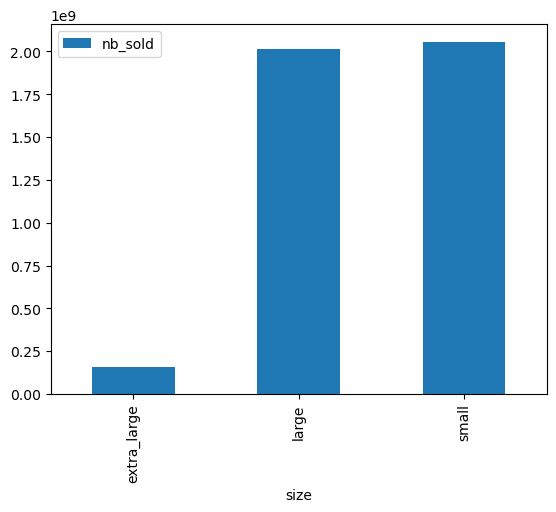

In [199]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Read avocado.csv
avocados = pd.read_csv('../data/avocado.csv')

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.pivot_table(values='nb_sold', index='size', aggfunc=sum)

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

> It looks like small avocados were the most-purchased size, but large avocados were a close second.

### Line Plots
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

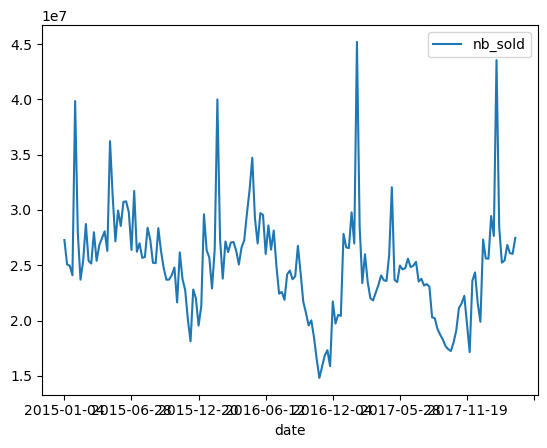

In [200]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.pivot_table(index='date', values='nb_sold', aggfunc='sum')

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

> Line plots are great for visualizing something over time. Here, it looks like the number of avocados spikes around the same time each year.

### Scatter Plots
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

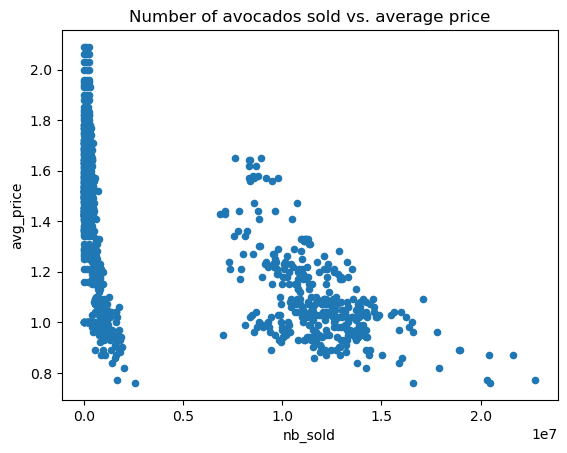

In [201]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

> It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

### Histogram
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

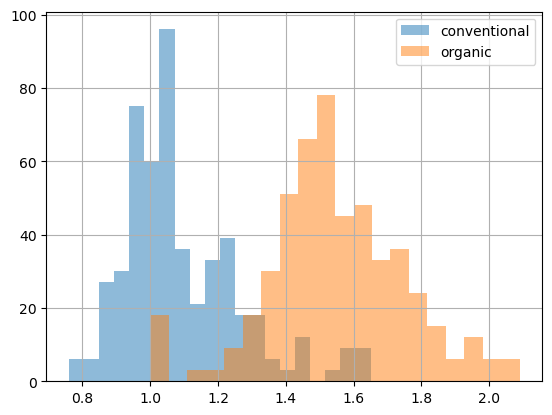

In [205]:
# conventional
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# organic
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

> We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

### Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [209]:
avocados_2016 = pd.read_csv('../data/avocados_2016.csv')

# Check individual values for missing values
print(avocados_2016.isna().head())

    date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0  False      False       False       False       False    False   
1  False      False       False       False       False    False   
2  False      False       False       False        True    False   
3  False      False       False       False       False    False   
4  False      False       False       False       False     True   

   total_bags_sold  small_bags_sold  large_bags_sold  xl_bags_sold  
0            False            False            False         False  
1            False            False            False         False  
2            False            False            False         False  
3            False            False            False         False  
4            False            False            False         False  


In [210]:
# Check each column for missing values
print(avocados_2016.isna().any())

date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


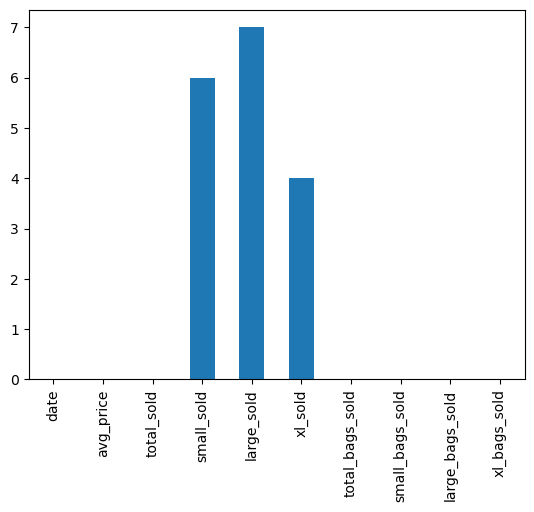

In [211]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

> It looks like there are missing values in the small_sold, large_sold, and xl_sold columns.

### Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [212]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


### Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms

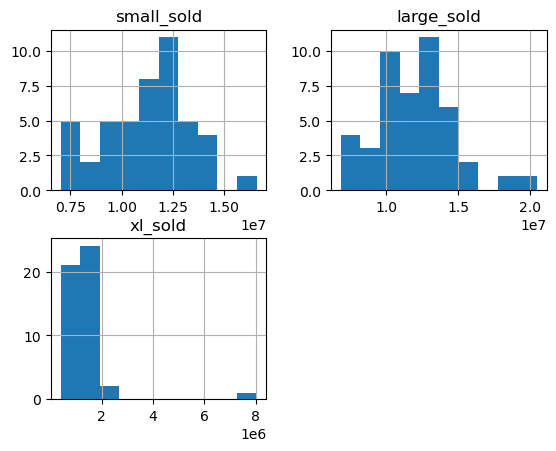

In [213]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

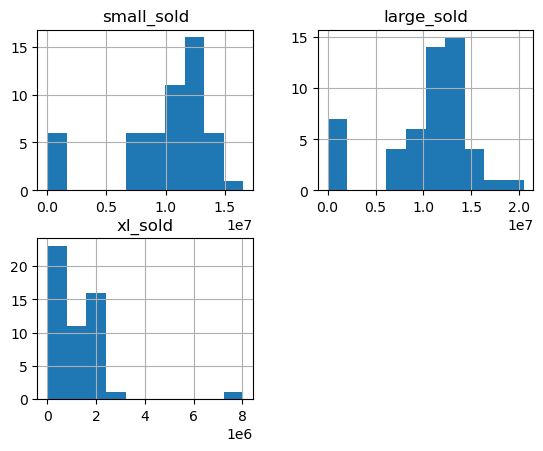

In [214]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()
plt.show()

# Show the plot
plt.show()

> Notice how the distribution has changed shape after replacing missing values with zeros.

### List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

In [215]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


### Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

In [216]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
